I download the "cats-and-dogs" dataset from Kaggle through this https://www.kaggle.com/tongpython/cat-and-dog.
Put it into the right folder and then i'm good to go.

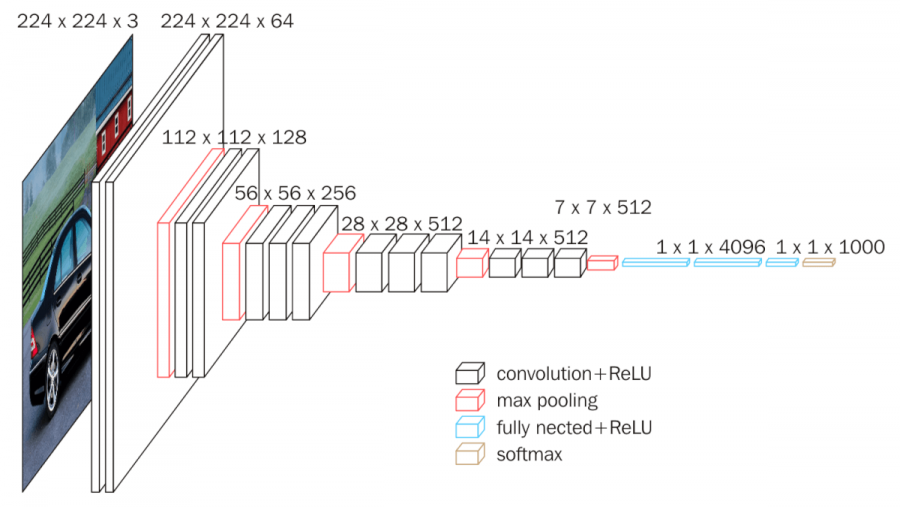

In [16]:
# @author: Yoss

import platform
import tensorflow
import keras
import os
print("Platform: {}".format(platform.platform()))
print("Tensorflow version: {}".format(tensorflow.__version__))
print("Keras version: {}".format(keras.__version__))
print(os.getcwd())

Platform: Linux-4.4.0-1102-aws-x86_64-with-debian-stretch-sid
Tensorflow version: 2.0.0
Keras version: 2.3.1
/home/ubuntu/yoss_project/yoss_project_2/project


In [2]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
import numpy as np

This is a keras preprocessing library called ImageDataGenerator where we preprocess our data.
Here,i'm setting the size of all the images as 224x224 as that is the standard 
input size for a VGG-16 network

In [40]:
from keras.preprocessing.image import ImageDataGenerator
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory = r"cat-and-dog/training_set/training_set/", target_size = (224, 224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory = r"cat-and-dog/test_set/test_set/", target_size = (224, 224))

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


Now i will define the model using Keras Sequential API. I will define the VGG-16 network using Convolution Layers, Max Pooling Layers and Dense Layers.

In [4]:
model = Sequential()
model.add(Conv2D(input_shape = (224, 224, 3),filters = 64,kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size =  (3, 3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2, 2), strides = (2, 2)))
model.add(Conv2D(filters = 128, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2, 2),strides = (2, 2)))
model.add(Conv2D(filters = 256, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size =  (3, 3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2, 2),strides = (2, 2)))
model.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2, 2),strides = (2, 2)))
model.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3, 3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2, 2), strides = (2, 2)))
model.add(Flatten())
model.add(Dense(units = 4096, activation = "relu"))
model.add(Dense(units = 4096, activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))

Now I need to define the optimizer and the loss function.

In [5]:
from keras.optimizers import Adam
opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = keras.losses.categorical_crossentropy, metrics = ['accuracy'])

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 256)      

Now, I need to train our model, I have used two callbacks(ModelCheckpoint and EarlyStopping)

In [36]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor = 'val_accuracy', verbose = 1, save_best_only = True, save_weights_only = False, mode = 'auto', period = 1)
early = EarlyStopping(monitor = 'val_accuracy', min_delta = 0, patience = 20, verbose = 1, mode = 'auto')
hist = model.fit_generator(steps_per_epoch = 10, generator = traindata, validation_data = testdata, validation_steps = 10, epochs = 100, callbacks = [checkpoint, early])

Epoch 1/100
10/10 [==============================] - 52s 5s/step - loss: 0.6939 - accuracy: 0.4875 - val_loss: 0.6933 - val_accuracy: 0.4781

Epoch 00001: val_accuracy improved from -inf to 0.47813, saving model to vgg16_1.h5
Epoch 2/100
10/10 [==============================] - 52s 5s/step - loss: 0.6942 - accuracy: 0.4750 - val_loss: 0.6933 - val_accuracy: 0.5000

Epoch 00002: val_accuracy improved from 0.47813 to 0.50000, saving model to vgg16_1.h5
Epoch 3/100
10/10 [==============================] - 52s 5s/step - loss: 0.6939 - accuracy: 0.4688 - val_loss: 0.6944 - val_accuracy: 0.5156

Epoch 00003: val_accuracy improved from 0.50000 to 0.51562, saving model to vgg16_1.h5
Epoch 4/100
10/10 [==============================] - 52s 5s/step - loss: 0.6935 - accuracy: 0.4656 - val_loss: 0.6931 - val_accuracy: 0.5156

Epoch 00004: val_accuracy did not improve from 0.51562
Epoch 5/100
10/10 [==============================] - 52s 5s/step - loss: 0.6934 - accuracy: 0.4469 - val_loss: 0.6926 -

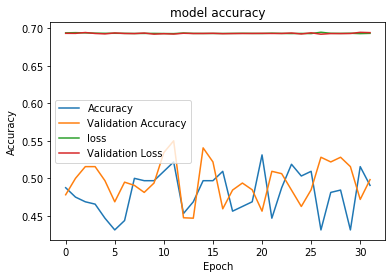

In [37]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [30]:
!wget "https://www.guidedogs.org/wp-content/uploads/2019/11/website-donate-mobile.jpg"

--2020-03-14 12:37:38--  https://www.guidedogs.org/wp-content/uploads/2019/11/website-donate-mobile.jpg
Resolving www.guidedogs.org (www.guidedogs.org)... 192.138.21.222
Connecting to www.guidedogs.org (www.guidedogs.org)|192.138.21.222|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47539 (46K) [image/jpeg]
Saving to: ‘website-donate-mobile.jpg.1’

website-donate-mobi 100%[===================>]  46.42K   309KB/s    in 0.2s    

2020-03-14 12:37:38 (309 KB/s) - ‘website-donate-mobile.jpg.1’ saved [47539/47539]



cat


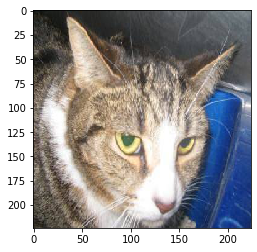

In [42]:
from keras.preprocessing import image
img = image.load_img(r"cat-and-dog/test_set/test_set/cats/cat.4998.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("vgg16_1.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print('dog')